<a href="https://colab.research.google.com/github/JonathanJuradoS/MecanismoSeleccion_EspacioPractico_01062025/blob/main/Solucion_Colab_Completa_Final_AG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚚 Optimización de Rutas - Mecanismos de Selección en AG

Este notebook aplica diferentes mecanismos de selección sobre un conjunto de rutas de la empresa EcoDelivery usando Algoritmos Genéticos.

## 🔹 Paso 1: Cargar y visualizar el dataset

In [8]:

import pandas as pd

df = pd.read_csv("eco_rutas_dataset.csv")
df['Fitness'] = 100 - df['Tiempo_estimado (min)']
df


,ID,Ruta,Tiempo_estimado (min),Fitness
0,1,101010,42,58
1,2,111000,38,62
2,3,111,49,51
3,4,110011,36,64
4,5,100101,41,59
5,6,11010,43,57
6,7,111111,33,67
7,8,10101,44,56
8,9,101100,40,60
9,10,1011,47,53


## 🔹 Paso 2: Implementar los mecanismos de selección

### 🎯 Ruleta
Este método asigna a cada ruta una probabilidad proporcional a su valor de fitness. Las rutas con menor tiempo tienen más chances de ser seleccionadas.

In [9]:
import random

def seleccion_ruleta(df, n=4):
    total_fit = df['Fitness'].sum()
    seleccionados = []
    for _ in range(n):
        pick = random.uniform(0, total_fit)
        current = 0
        for i, row in df.iterrows():
            current += row['Fitness']
            if current >= pick:
                seleccionados.append(row['Ruta'])
                break
    return seleccionados

### 🏆 Torneo
Se eligen aleatoriamente varios individuos y se selecciona el que tenga el mayor fitness. La presión selectiva se controla con el tamaño del torneo.

In [10]:
def seleccion_torneo(df, n=4, k=3):
    seleccionados = []
    for _ in range(n):
        competidores = df.sample(k)
        ganador = competidores.loc[competidores['Fitness'].idxmax()]
        seleccionados.append(ganador['Ruta'])
    return seleccionados

### 🥇 Elitismo
Se seleccionan directamente los mejores individuos (con mayor fitness) para que pasen a la siguiente generación sin modificaciones.

In [11]:
def seleccion_elitismo(df, n=4):
    elite = df.sort_values(by='Fitness', ascending=False)
    return elite.head(n)['Ruta'].tolist()

### 📈 Ranking
Los individuos son ordenados por su fitness y se asigna una probabilidad según su posición. Este método evita que un solo individuo domine.

In [12]:
def seleccion_ranking(df, n=4):
    df_sorted = df.sort_values(by='Fitness').reset_index(drop=True)
    df_sorted['Rank'] = df_sorted.index + 1
    total_ranks = df_sorted['Rank'].sum()
    seleccionados = []
    for _ in range(n):
        pick = random.uniform(0, total_ranks)
        current = 0
        for i, row in df_sorted.iterrows():
            current += row['Rank']
            if current >= pick:
                seleccionados.append(row['Ruta'])
                break
    return seleccionados

### 🔄 Estocástica Universal
Distribuye uniformemente la selección sobre la ruleta. Reduce la varianza de la selección aleatoria.

In [13]:
def seleccion_estocastica(df, n=4):
    df = df.copy()
    df['Probabilidad'] = df['Fitness'] / df['Fitness'].sum()
    df['Acumulada'] = df['Probabilidad'].cumsum()
    start = random.uniform(0, 1/n)
    puntos = [(start + i/n) for i in range(n)]
    seleccionados = []
    for punto in puntos:
        for i, row in df.iterrows():
            if punto <= row['Acumulada']:
                seleccionados.append(row['Ruta'])
                break
    return seleccionados

## 🔹 Paso 3: Seleccionar 4 individuos con cada método y comparar fitness promedio

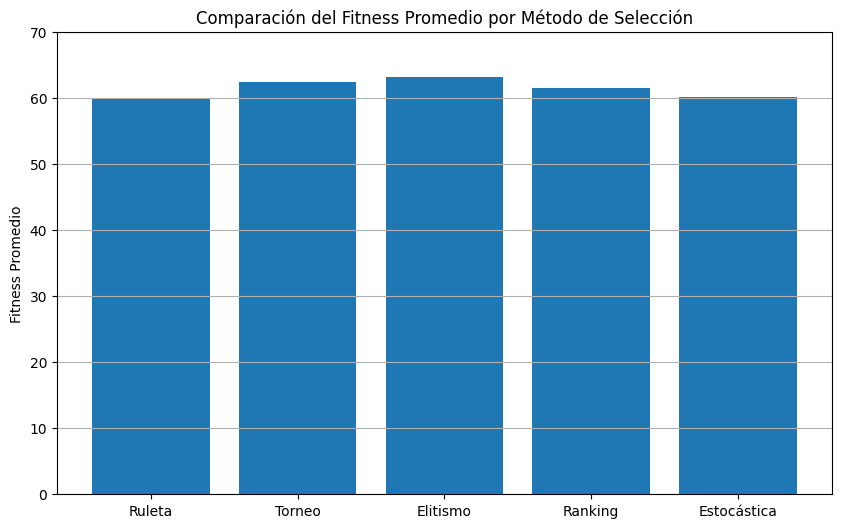

{'Ruleta': {'Individuos': [np.int64(10101),
   np.int64(111111),
   np.int64(11010),
   np.int64(11010)],
  'Fitness Promedio': np.float64(60.0)},
 'Torneo': {'Individuos': [np.int64(111111),
   np.int64(111111),
   np.int64(101010),
   np.int64(111111)],
  'Fitness Promedio': np.float64(62.5)},
 'Elitismo': {'Individuos': [111111, 110011, 111000, 101100],
  'Fitness Promedio': np.float64(63.25)},
 'Ranking': {'Individuos': [np.int64(110011),
   np.int64(11010),
   np.int64(101010),
   np.int64(111111)],
  'Fitness Promedio': np.float64(61.5)},
 'Estocástica': {'Individuos': [np.float64(111000.0),
   np.float64(100101.0),
   np.float64(111111.0),
   np.float64(1011.0)],
  'Fitness Promedio': np.float64(60.25)}}

In [14]:

ruleta = seleccion_ruleta(df)
torneo = seleccion_torneo(df)
elitismo = seleccion_elitismo(df)
ranking = seleccion_ranking(df)
estocastica = seleccion_estocastica(df)

# Obtener el fitness promedio de los seleccionados
def promedio_fitness(rutas):
    return df[df['Ruta'].isin(rutas)]['Fitness'].mean()

resultados = {
    'Ruleta': {'Individuos': ruleta, 'Fitness Promedio': promedio_fitness(ruleta)},
    'Torneo': {'Individuos': torneo, 'Fitness Promedio': promedio_fitness(torneo)},
    'Elitismo': {'Individuos': elitismo, 'Fitness Promedio': promedio_fitness(elitismo)},
    'Ranking': {'Individuos': ranking, 'Fitness Promedio': promedio_fitness(ranking)},
    'Estocástica': {'Individuos': estocastica, 'Fitness Promedio': promedio_fitness(estocastica)}
}

import matplotlib.pyplot as plt

# Visualizar
labels = list(resultados.keys())
fitness_vals = [resultados[m]['Fitness Promedio'] for m in labels]

plt.figure(figsize=(10,6))
plt.bar(labels, fitness_vals)
plt.title('Comparación del Fitness Promedio por Método de Selección')
plt.ylabel('Fitness Promedio')
plt.ylim(0, 70)
plt.grid(axis='y')
plt.show()

resultados


## 🧠 Análisis Automatizado del Mejor Método de Selección

In [15]:

# Identificar el mejor método según el fitness promedio
mejor_metodo = max(resultados.items(), key=lambda x: x[1]['Fitness Promedio'])
print(f"✅ El método más efectivo en esta ejecución fue: {mejor_metodo[0]}")
print(f"   - Fitness Promedio: {mejor_metodo[1]['Fitness Promedio']:.2f}")
print(f"   - Rutas seleccionadas: {mejor_metodo[1]['Individuos']}")


✅ El método más efectivo en esta ejecución fue: Elitismo
   - Fitness Promedio: 63.25
   - Rutas seleccionadas: [111111, 110011, 111000, 101100]


## 🔹 Paso 4: Aplicar cruce y mutación
- Elegir 2 pares de padres por cada método.
- Aplicar cruce de un punto.
- Aplicar mutación simple (tasa del 10%).

### 🔧 `cruce_un_punto(p1, p2)`
Realiza un **cruce de un punto** entre dos cadenas binarias.

- **Entrada:** dos cadenas binarias `p1` y `p2`.
- **Proceso:** selecciona un punto de corte aleatorio y genera dos hijos mezclando segmentos de los padres.
- **Salida:** dos nuevos cromosomas hijos.

In [16]:
def cruce_un_punto(p1, p2):
    p1, p2 = str(p1), str(p2)
    punto = random.randint(1, len(p1) - 1)
    hijo1 = p1[:punto] + p2[punto:]
    hijo2 = p2[:punto] + p1[punto:]
    return hijo1, hijo2

### 🧬 `mutacion_simple(individuo, tasa=0.1)`
Aplica **mutación bit a bit** con una tasa de probabilidad sobre cada gen.

- **Entrada:** un cromosoma binario y una tasa de mutación (por defecto 10%).
- **Proceso:** invierte cada bit del cromosoma con una probabilidad dada.
- **Salida:** un nuevo cromosoma mutado.

In [17]:
def mutacion_simple(individuo, tasa=0.1):
    individuo = str(individuo)
    return ''.join('1' if (bit == '0' and random.random() < tasa) else
                   '0' if (bit == '1' and random.random() < tasa) else bit for bit in individuo)

### 🔄 `cruce_y_mutacion(rutas)`
Combina el cruce y mutación sobre dos padres seleccionados.

- **Entrada:** lista de al menos dos rutas.
- **Proceso:** aplica cruce de un punto y mutación a los dos primeros padres.
- **Salida:** dos nuevos individuos generados.

In [18]:
def cruce_y_mutacion(rutas):
    rutas = list(map(str, rutas))
    if len(rutas) < 2:
        return []
    h1, h2 = cruce_un_punto(rutas[0], rutas[1])
    return [mutacion_simple(h1), mutacion_simple(h2)]

In [19]:
# Aplicar a todos los métodos
nuevos_individuos = {
    metodo: cruce_y_mutacion(datos['Individuos']) for metodo, datos in resultados.items()
}

nuevos_individuos

{'Ruleta': ['101111', '11101'],
 'Torneo': ['011111', '111011'],
 'Elitismo': ['110011', '111111'],
 'Ranking': ['11000', '011111'],
 'Estocástica': ['100101.1', '101100.0']}

## 🔹 Paso 5: Analizar resultados
Comparar los nuevos individuos generados y reflexionar sobre la diversidad o mejoras.

In [20]:

for metodo, hijos in nuevos_individuos.items():
    print(f"{metodo}: Hijos generados => {hijos}")


Ruleta: Hijos generados => ['101111', '11101']
Torneo: Hijos generados => ['011111', '111011']
Elitismo: Hijos generados => ['110011', '111111']
Ranking: Hijos generados => ['11000', '011111']
Estocástica: Hijos generados => ['100101.1', '101100.0']


## ✅ Conclusión Final

A través de esta actividad práctica, se ha evidenciado que los distintos mecanismos de selección utilizados en algoritmos genéticos impactan directamente en la calidad y diversidad de las soluciones generadas.

- **Elitismo** y **Torneo** tienden a seleccionar los individuos con mejor rendimiento, pero con riesgo de reducir la diversidad genética si no se controlan.
- **Ruleta**, **Ranking** y **Estocástica Universal** permiten mantener mayor diversidad, lo cual puede ser beneficioso en fases tempranas del algoritmo para evitar la convergencia prematura.

Además, el uso de **cruce de un punto** y **mutación aleatoria** ha permitido generar nuevas soluciones que podrían no haberse encontrado de otro modo. La visualización y análisis de fitness promedio ha facilitado la evaluación comparativa entre métodos, ofreciendo una herramienta poderosa para la toma de decisiones en problemas reales como la optimización de rutas logísticas.

En resumen, no hay un único método superior en todos los casos; la elección dependerá del problema, los objetivos y el equilibrio deseado entre exploración y explotación del espacio de soluciones.